In [2]:
import pandas as pd
file_path = '/mnt/c/Users/KDT21/Desktop/DM/diabetes.csv'
diabetes_df = pd.read_csv(file_path)

In [3]:
col_to_drop = 'Insulin'
non_ins_df = diabetes_df.drop(columns=[col_to_drop], axis=1)
print(non_ins_df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   31.992578   
std       3.369578   31.972618      19.355807      15.952218    7.884160   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000   27.300000   
50%       3.000000  117.000000      72.000000      23.000000   32.000000   
75%       6.000000  140.250000      80.000000      32.000000   36.600000   
max      17.000000  199.000000     122.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.471876   33.240885    0.348958  
std                    0.331329   11.760232    0.476951  
min                    0.078000   21.000000    0.000000  
25%                    0.

In [4]:
import pandas as pd
import numpy as np

nan_df = non_ins_df.copy()
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
nan_df[cols_to_replace] = nan_df[cols_to_replace].replace(0, np.nan)

dropped_df = nan_df.dropna(how='any')

print("--- NaN 포함 행 삭제 후 데이터셋 크기 ---")
print(dropped_df.shape)

print("\n--- 삭제 후 기술 통계량 (min 값 확인) ---")
print(dropped_df.describe())

--- NaN 포함 행 삭제 후 데이터셋 크기 ---
(532, 8)

--- 삭제 후 기술 통계량 (min 값 확인) ---
       Pregnancies     Glucose  BloodPressure  SkinThickness         BMI  \
count   532.000000  532.000000     532.000000     532.000000  532.000000   
mean      3.516917  121.030075      71.505639      29.182331   32.890226   
std       3.312036   30.999226      12.310253      10.523878    6.881109   
min       0.000000   56.000000      24.000000       7.000000   18.200000   
25%       1.000000   98.750000      64.000000      22.000000   27.875000   
50%       2.000000  115.000000      72.000000      29.000000   32.800000   
75%       5.000000  141.250000      80.000000      36.000000   36.900000   
max      17.000000  199.000000     110.000000      99.000000   67.100000   

       DiabetesPedigreeFunction         Age     Outcome  
count                532.000000  532.000000  532.000000  
mean                   0.502966   31.614662    0.332707  
std                    0.344546   10.761584    0.471626  
min         

In [5]:
data_target = dropped_df['Outcome']
data_input = dropped_df.drop('Outcome', axis=1)

In [6]:
from sklearn.model_selection import train_test_split

#비표준화 데이터 준비
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, test_size = 0.2, stratify = data_target, random_state=42)

In [7]:
# 표준화 데이터 준비
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = scaler.fit_transform(train_input)  
test_scaled = scaler.transform(test_input) 

In [ ]:
# 1번, 로지스틱회귀(non_scaled_data)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_input, train_target)

print("------------------lr의 계수------------------")
print("속성 내 값 간 차이가 큰 속성일수록 가중치가 크게 부여되는 줄 알았으나 그렇지 않음--> 오히려반대)
print(train_input.columns)
print(lr.coef_, lr.intercept_)

------------------lr의 계수------------------
속성 내 값 간 차이가 큰 속성일수록 가중치가 크게 부여되는 줄 알았으나 그렇지 않음
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
[[ 0.10634561  0.0344562  -0.00198058  0.01408995  0.0707565   0.92445211
   0.02308603]] [-9.31491702]


/home/chee0107/miniconda3/envs/ai-study/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 1번 경고문 해결
lr_iter = LogisticRegression(max_iter=1000) 
lr_iter.fit(train_input, train_target)

print("------------------lr_iter 계수------------------")
#print("속성 내 값 간 차이가 큰 속성일수록 가중치가 크게 부여되는 줄 알았으나 그렇지 않음 -> 그 반대")
print(train_input.columns)
print(lr_iter.coef_, lr_iter.intercept_)

------------------lr_iter 계수------------------
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
[[ 0.10654586  0.03444727 -0.00188563  0.01415171  0.07058433  0.92599265
   0.02297692]] [-9.31447976]


In [10]:
# 2번, 로지스틱회귀(scaled_data)

lr_scaled = LogisticRegression()
lr_scaled.fit(train_scaled, train_target)

print("------------------lr의 계수------------------")
print(train_input.columns)
print(lr_scaled.coef_, lr_scaled.intercept_)

------------------lr의 계수------------------
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
[[ 0.34726824  1.04804587 -0.01511961  0.15365905  0.47630476  0.36443619
   0.24757153]] [-0.97733447]


In [11]:
# 각 로지스틱 회귀 모델의 score 확인
print(f"lr train score = {lr_iter.score(train_input, train_target)}")
print(f"lr test score = {lr_iter.score(test_input, test_target)}")
print()
print(f"lr_scaled train score: {lr_scaled.score(train_scaled, train_target)}")
print(f"lr_scaled test score: {lr_scaled.score(test_scaled, test_target)}")

lr train score = 0.7835294117647059
lr test score = 0.8037383177570093

lr_scaled train score: 0.7788235294117647
lr_scaled test score: 0.8130841121495327


In [12]:
# 1번
print(f"lr 원시 스코어(결정함수, + / -) : {lr.decision_function(test_input[:5])}")
print()
print(f"lr 원시점수 시그모이드 변환 값 \n {lr.predict_proba(test_input[:5])}")
print()
print(test_target[:5])

lr 원시 스코어(결정함수, + / -) : [-1.50843016 -0.20992824  0.80740234 -0.02714961  0.607207  ]

lr 원시점수 시그모이드 변환 값 
 [[0.81882844 0.18117156]
 [0.55229016 0.44770984]
 [0.30844432 0.69155568]
 [0.50678699 0.49321301]
 [0.35269658 0.64730342]]

718    0
540    1
227    1
191    0
14     1
Name: Outcome, dtype: int64


In [13]:
#2번
print(f"lr_scaled 원시 스코어(결정함수, + / -) : {lr_scaled.decision_function(test_scaled[:5])}")
print()
print(f"lr_scaled 원시점수 시그모이드 변환 값 \n {lr_scaled.predict_proba(test_scaled[:5])}")
print()
print(test_target[:5])

lr_scaled 원시 스코어(결정함수, + / -) : [-1.50894243 -0.18635304  0.78625649 -0.04259213  0.59486025]

lr_scaled 원시점수 시그모이드 변환 값 
 [[0.81890442 0.18109558]
 [0.5464539  0.4535461 ]
 [0.31297304 0.68702696]
 [0.51064642 0.48935358]
 [0.35552047 0.64447953]]

718    0
540    1
227    1
191    0
14     1
Name: Outcome, dtype: int64


In [14]:
#lr.decision_function을 수동으로 시그모이드 함수로 변형하기

des = lr.decision_function(test_input[:5])

from scipy.special import expit      #시그모이드 함수
proba = expit(des)
#print(np.round(proba, decimals=3))
print(np.round(proba, 3))

[0.181 0.448 0.692 0.493 0.647]


In [15]:
from scipy.special import softmax   #소프트맥스는 다중 분류용 함수이기때문에 이진분류에 적합하지 않음
proba = softmax(des)
print(np.round(proba, 3))

[0.036 0.133 0.369 0.16  0.302]


In [16]:
from sklearn.model_selection import GridSearchCV

#탐색할 매개변수와 값 생성(각각 규제종류, 최적화 알고리즘, 규제 강도)
params = [{'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.01, 1.0, 100.0]},
          {'penalty': ['l2'], 'solver': ['liblinear', 'saga', 'lbfgs'], 'C': [0.01, 1.0, 100.0]}]

In [17]:
# 3번, 하이퍼파라미터 튜닝(non_scaled data)

gs = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), params, n_jobs=-1)
gs.fit(train_input, train_target)
best = gs.best_estimator_
print(f"최적 매개변수: {best}") #params 객체에서 탐색한 매개변수 설정들 중에서 가장 최적이라고 판단된 값 저장
print(f"최적의 train score: {gs.score(train_input, train_target)}")
print(f"최적의 test score: {gs.score(test_input, test_target)}")

#max_iter 1000으로 하면 지정된 최대 반복 횟수(max_iter=1000) 내에 최적의 해(Solution)를 찾지 못하고 멈췄다는 경고 뜸

최적 매개변수: LogisticRegression(C=100.0, max_iter=10000, penalty='l1', random_state=42,
                   solver='liblinear')
최적의 train score: 0.7811764705882352
최적의 test score: 0.8130841121495327


In [18]:
lr_gs = LogisticRegression(C=100.0, max_iter=10000, penalty='l1', random_state=42, solver='liblinear')
lr_gs.fit(train_input, train_target)

print(f"lr_gs train score = {lr_gs.score(train_input, train_target)}")
print(f"lr_gs test score = {lr_gs.score(test_input, test_target)}")

lr_gs train score = 0.7811764705882352
lr_gs test score = 0.8130841121495327


In [19]:
# 4번, 하이퍼파라미터 튜닝(scaled data)

gs_scaled = GridSearchCV(LogisticRegression(max_iter=10000, random_state=42), params, n_jobs=-1)
gs_scaled.fit(train_scaled, train_target)
bestt = gs_scaled.best_estimator_ 
print(f"최적의 매개변수: {bestt}") 
print(f"최적의 train score: {gs_scaled.score(train_scaled, train_target)}")
print(f"최적의 test score: {gs_scaled.score(test_scaled, test_target)}")

최적의 매개변수: LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')
최적의 train score: 0.7788235294117647
최적의 test score: 0.8130841121495327


In [20]:
lr_gs_scaled = LogisticRegression(max_iter=10000, random_state=42, solver='liblinear')
lr_gs_scaled.fit(train_scaled, train_target)

print(f"lr_gs_scaled train score = {lr_gs_scaled.score(train_scaled, train_target)}")
print(f"lr_gs_scaled test score = {lr_gs_scaled.score(test_scaled, test_target)}")

lr_gs_scaled train score = 0.7788235294117647
lr_gs_scaled test score = 0.8130841121495327


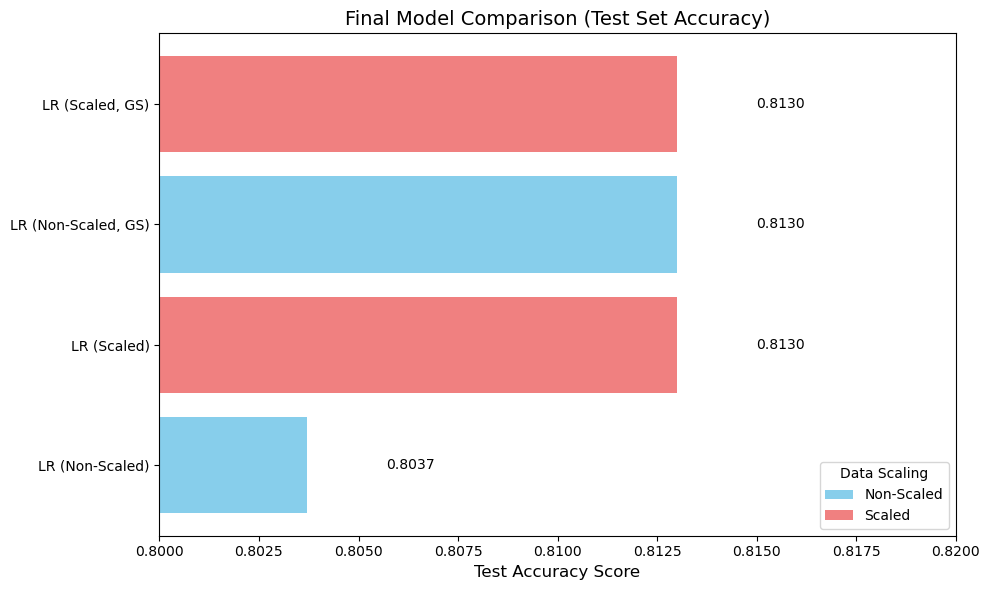

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 정의 (변수명 및 키 수정)
model_data = {
    'model': [{
        'LR (Non-Scaled)': 0.8037,
        'LR (Scaled)': 0.8130,
        'LR (Non-Scaled, GS)': 0.8130,
        'LR (Scaled, GS)': 0.8130
    }]
}

# 2. 막대 그래프에 사용할 데이터 추출 및 정렬
# 데이터는 리스트의 0번째 요소에 있는 딕셔너리입니다.
performance_dict = model_data['model'][0]

# 점수를 기준으로 내림차순 정렬을 위해 zip 사용
sorted_items = sorted(performance_dict.items(), key=lambda item: item[1], reverse=False)

# 정렬된 설정 이름 (Y축)과 점수 (X축/Width) 추출
configurations = [item[0] for item in sorted_items]
scores = [item[1] for item in sorted_items]

# 3. 데이터 Scaling Type에 따른 색상 리스트 생성 (수정된 동적 매핑)
colors = []
for config in configurations:
    # 'Non-Scaled' 문자열이 명확하게 포함되어 있는 경우에만 푸른색(skyblue) 적용
    if 'Non-Scaled' in config:
        colors.append('skyblue')     # Non-Scaled 데이터
    # 그 외의 모든 경우 (즉, 'Scaled'만 포함된 경우)에 붉은색 계열 적용
    else:
        colors.append('lightcoral')  # Scaled 데이터 또는 기타
plt.figure(figsize=(10, 6))

# 4. 수평 막대 그래프 (plt.barh) 그리기
# plt.barh(y축 위치, 막대 길이)
bars = plt.barh(configurations, scores, color=colors) 

# 5. 그래프 꾸미기 (요청 내용 반영 및 점수 텍스트 추가)
plt.title('Final Model Comparison (Test Set Accuracy)', fontsize=14)
plt.xlabel('Test Accuracy Score', fontsize=12)
plt.xlim(0.80, 0.82)

# 막대에 점수 텍스트 추가
for bar in bars:
    plt.text(
        bar.get_width() + 0.002,
        bar.get_y() + bar.get_height()/2,
        f'{bar.get_width():.4f}',
        va='center'
    )

# 6. 범례 수동 생성 (Matplotlib은 barh의 색상 매핑을 자동으로 범례에 추가하지 않으므로 수동 처리)
legend_handles = [plt.Rectangle((0,0), 1, 1, fc='skyblue'), plt.Rectangle((0,0), 1, 1, fc='lightcoral')]
plt.legend(legend_handles, ['Non-Scaled', 'Scaled'], title='Data Scaling', loc='lower right')

plt.tight_layout()
plt.show()